# Descriptive Analysis on Fifa 22 leagues

Let's analyze the data of the teams in the Fifa 22.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
team = pd.read_csv('data/teams_fifa22.csv')
team.head(10)

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
0,1,Arsenal,English Premier League (1),13,79,83,81,77,77500000,7,7,33,25.4,23.3
1,2,Aston Villa,English Premier League (1),13,78,78,76,77,37500000,4,3,31,24.9,23.3
2,1925,Brentford,English Premier League (1),13,73,73,74,73,18000000,1,1,33,24.7,23.4
3,1808,Brighton & Hove Albion,English Premier League (1),13,76,75,77,75,28000000,2,1,33,26.9,23.5
4,1796,Burnley,English Premier League (1),13,76,76,76,77,22000000,2,1,33,28.6,26.6
5,5,Chelsea,English Premier League (1),13,83,84,86,81,85000000,8,8,33,26.8,24.8
6,1799,Crystal Palace,English Premier League (1),13,76,77,76,74,30000000,3,2,33,27.6,25.3
7,7,Everton,English Premier League (1),13,79,79,78,79,49000000,6,5,33,27.1,25.7
8,8,Leeds United,English Premier League (1),13,77,78,78,76,32500000,5,2,31,26.4,22.7
9,95,Leicester City,English Premier League (1),13,80,82,81,79,50000000,7,6,33,27.4,25.3


In [3]:
team.corr()

,ID,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
ID,1.000000,0.429844,-0.361668,-0.292364,-0.351276,-0.378186,-0.205886,-0.283398,-0.128134,-0.102225,0.225787,0.236975
LeagueId,0.429844,1.000000,-0.345309,-0.259912,-0.335959,-0.363965,-0.147324,-0.062376,-0.022551,-0.124095,0.167147,0.140170
Overall,-0.361668,-0.345309,1.000000,0.922010,0.977006,0.973619,0.571446,0.438178,0.638882,0.268609,0.093225,0.139958
Attack,-0.292364,-0.259912,0.922010,1.000000,0.886222,0.877049,0.562212,0.413119,0.612327,0.249060,0.141035,0.159524
Midfield,-0.351276,-0.335959,0.977006,0.886222,1.000000,0.942644,0.566240,0.428657,0.633280,0.261805,0.091713,0.118151
Defence,-0.378186,-0.363965,0.973619,0.877049,0.942644,1.000000,0.562765,0.432600,0.613958,0.254191,0.080379,0.107076
TransferBudget,-0.205886,-0.147324,0.571446,0.562212,0.566240,0.562765,1.000000,0.277365,0.511720,0.361535,0.026161,-0.041784
DomesticPrestige,-0.283398,-0.062376,0.438178,0.413119,0.428657,0.432600,0.277365,1.000000,0.663440,-0.039841,0.047428,0.057146
IntPrestige,-0.128134,-0.022551,0.638882,0.612327,0.633280,0.613958,0.511720,0.663440,1.000000,0.036260,0.154972,0.174264
Players,-0.102225,-0.124095,0.268609,0.249060,0.261805,0.254191,0.361535,-0.039841,0.036260,1.000000,0.016887,-0.136440


In [4]:
#how many teams for every league
team['League'].value_counts()

1014                                          35
International                                 33
USA Major League Soccer (1)                   27
Argentina Primera División  (1)               26
English League Two (4)                        25
English League Championship (2)               24
English League One (3)                        24
Italian Serie A (1)                           23
Copa Latina (Copa Libertadores de América)    22
Spanish Segunda División (2)                  22
Spain Primera Division (1)                    20
Turkish Süper Lig (1)                         20
French Ligue 2 (2)                            20
English Premier League (1)                    20
Japanese J. League Division 1 (1)             20
French Ligue 1 (1)                            20
German 3. Bundesliga (3)                      20
Holland Eredivisie (1)                        18
Belgian Jupiler Pro League (1)                18
German 1. Bundesliga (1)                      18
German 2. Bundesliga

#### Something is wrong in italian Serie A : there are too many teams. In this league there are only 20 teams.

In [16]:
#top six leagues creations
serie_a = team.loc[team['League'] == 'Italian Serie A (1)']
bundes = team[team['League'] == 'German 1. Bundesliga (1)']
ligue_1 = team[team['League'] == 'French Ligue 1 (1)']
premier = team[team['League'] == 'English Premier League (1)']
liga = team[team['League'] == 'Spain Primera Division (1)']
primeira = team[team['League'] == 'Portuguese Liga ZON SAGRES (1)']

top_six = team.loc[team['League'].apply(lambda nation : nation in ['Italian Serie A (1)','German 1. Bundesliga (1)','French Ligue 1 (1)','Spain Primera Division (1)','Portuguese Liga ZON SAGRES (1)'])]
#team[team.League.isin(['Italian Serie A (1)','German 1. Bundesliga (1)','French Ligue 1 (1)','Spain Primera Division (1)','Portuguese Liga ZON SAGRES (1)'])] another way to filter


In [92]:
top_six

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
20,69,AS Monaco,French Ligue 1 (1),16,78,82,77,77,26100000,8,6,27,24.9,24.0
21,1819,AS Saint-Étienne,French Ligue 1 (1),16,73,76,74,72,12100000,6,3,29,24.3,23.1
22,1530,Angers SCO,French Ligue 1 (1),16,74,71,72,74,6300000,4,1,30,26.9,24.8
23,1815,Clermont Foot 63,French Ligue 1 (1),16,71,71,71,71,4500000,1,1,27,28.4,26.0
24,294,ESTAC Troyes,French Ligue 1 (1),16,72,73,72,70,5900000,1,1,33,26.4,25.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,234,SL Benfica,Portuguese Liga ZON SAGRES (1),308,79,78,79,79,29300000,10,6,29,27.7,26.4
526,1438,Santa Clara,Portuguese Liga ZON SAGRES (1),308,70,70,69,70,2300000,3,1,27,26.9,25.7
527,237,Sporting CP,Portuguese Liga ZON SAGRES (1),308,78,79,79,78,21600000,9,4,25,25.3,24.6
528,1887,Vitória Guimarães,Portuguese Liga ZON SAGRES (1),308,72,74,71,71,5900000,7,2,30,25.4,24.0


In [17]:
serie_a[serie_a['Name'].apply(lambda name : name in ['Benevento','Parma','Crotone'])]

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
59,112026,Benevento,Italian Serie A (1),31,69,70,68,69,5600000,1,1,24,28.0,25.6
62,110734,Crotone,Italian Serie A (1),31,67,66,68,66,4500000,1,1,24,25.6,23.8
72,50,Parma,Italian Serie A (1),31,71,72,69,70,8000000,4,2,28,27.7,24.5


#### We have to eliminate the teams that are no longer in Serie A:

In [65]:
serie_a = serie_a[serie_a['Name'].apply(lambda name : name not in ['Benevento','Parma','Crotone'])]
serie_a
#Attention to Empoli and Salernitana! Something is wrong in their DomesticPrestige values.   

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
58,39,Atalanta,Italian Serie A (1),31,80,81,80,78,20000000,7,7,25,28.4,26.8
60,189,Bologna,Italian Serie A (1),31,75,77,75,73,15000000,4,2,29,26.3,24.7
61,1842,Cagliari,Italian Serie A (1),31,75,76,74,74,10000000,4,1,29,28.0,26.2
63,1746,Empoli,Italian Serie A (1),31,71,73,69,70,4500000,1,1,28,24.0,24.7
64,110374,Fiorentina,Italian Serie A (1),31,76,77,76,74,25000000,6,5,27,25.9,25.8
65,110556,Genoa,Italian Serie A (1),31,74,75,72,74,8500000,3,2,33,28.8,26.8
66,206,Hellas Verona,Italian Serie A (1),31,75,75,75,74,8000000,3,1,27,27.1,25.6
67,44,Inter,Italian Serie A (1),31,82,82,81,83,99500000,9,7,28,28.4,28.1
68,45,Juventus,Italian Serie A (1),31,83,82,82,84,105000000,10,10,26,27.7,26.3
69,46,Lazio,Italian Serie A (1),31,80,80,81,79,39600000,7,6,32,29.9,27.1


In [60]:
#Let's subsitute them
# for idx, record in serie_a.iterrows():
#     if (record['Name'] == 'Empoli') or (record['Name'] == 'US Salernitana 1919'):
#         record['DomesticPrestige'] = record['IntPrestige']
       
serie_a.loc[serie_a['Name'] == 'Empoli','DomesticPrestige'] = serie_a.loc[serie_a['Name'] == 'Empoli']['IntPrestige']
serie_a.loc[serie_a['Name'] == 'US Salernitana 1919','DomesticPrestige'] = serie_a.loc[serie_a['Name'] == 'US Salernitana 1919']['IntPrestige']
serie_a

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
58,39,Atalanta,Italian Serie A (1),31,80,81,80,78,20000000,7,7,25,28.4,26.8
60,189,Bologna,Italian Serie A (1),31,75,77,75,73,15000000,4,2,29,26.3,24.7
61,1842,Cagliari,Italian Serie A (1),31,75,76,74,74,10000000,4,1,29,28.0,26.2
63,1746,Empoli,Italian Serie A (1),31,71,73,69,70,4500000,1,1,28,24.0,24.7
64,110374,Fiorentina,Italian Serie A (1),31,76,77,76,74,25000000,6,5,27,25.9,25.8
65,110556,Genoa,Italian Serie A (1),31,74,75,72,74,8500000,3,2,33,28.8,26.8
66,206,Hellas Verona,Italian Serie A (1),31,75,75,75,74,8000000,3,1,27,27.1,25.6
67,44,Inter,Italian Serie A (1),31,82,82,81,83,99500000,9,7,28,28.4,28.1
68,45,Juventus,Italian Serie A (1),31,83,82,82,84,105000000,10,10,26,27.7,26.3
69,46,Lazio,Italian Serie A (1),31,80,80,81,79,39600000,7,6,32,29.9,27.1


In [12]:
premier.corr()

,ID,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
ID,1.000000,NaN,-0.675749,-0.701250,-0.633083,-0.566340,-0.478025,-0.771764,-0.692073,-0.064834,0.064048,0.132133
LeagueId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall,-0.675749,NaN,1.000000,0.939795,0.927396,0.956332,0.869614,0.963065,0.953495,0.135652,0.218088,0.113308
Attack,-0.701250,NaN,0.939795,1.000000,0.854526,0.867857,0.792544,0.945974,0.943533,0.238636,0.133113,0.017795
Midfield,-0.633083,NaN,0.927396,0.854526,1.000000,0.864400,0.821888,0.910710,0.910930,0.200981,0.209849,0.042376
Defence,-0.566340,NaN,0.956332,0.867857,0.864400,1.000000,0.841216,0.883796,0.890518,0.149382,0.331924,0.174328
TransferBudget,-0.478025,NaN,0.869614,0.792544,0.821888,0.841216,1.000000,0.845188,0.861321,0.064890,0.037839,0.094332
DomesticPrestige,-0.771764,NaN,0.963065,0.945974,0.910710,0.883796,0.845188,1.000000,0.972274,0.090805,0.119378,0.048394
IntPrestige,-0.692073,NaN,0.953495,0.943533,0.910930,0.890518,0.861321,0.972274,1.000000,0.178321,0.093621,0.061933
Players,-0.064834,NaN,0.135652,0.238636,0.200981,0.149382,0.064890,0.090805,0.178321,1.000000,0.200586,0.086847


In [61]:
def prestige_mean(df):
    return round(sum(df['IntPrestige'])/len(df['IntPrestige']),2),round(sum(df['DomesticPrestige'])/len(df['DomesticPrestige']),2)

def budget_mean(df):
    return round(sum(df['TransferBudget'])/len(df['TransferBudget']),0)

def dict_statistics(list_df,list_df_name):
    dict_prestige = {}
    dict_budget = {}

    for name,dataframe in zip(list_df_name,list_df):
        dict_prestige[name]= prestige_mean(dataframe)
        dict_budget[name] = budget_mean(dataframe)

    return (dict_prestige,dict_budget)


list_dataframe = [serie_a,liga,ligue_1,primeira,premier,bundes]
list_dataframe_name =['Serie A','Liga','Ligue 1','Primeira Liga','Premier League','Bundesliga']

dict_statistics(list_dataframe,list_dataframe_name)



({'Serie A': (3.95, 4.95),
  'Liga': (4.1, 5.95),
  'Ligue 1': (2.75, 4.95),
  'Primeira Liga': (1.94, 4.78),
  'Premier League': (4.35, 5.15),
  'Bundesliga': (4.11, 5.0)},
 {'Serie A': 26695000.0,
  'Liga': 29420000.0,
  'Ligue 1': 19640000.0,
  'Primeira Liga': 7116667.0,
  'Premier League': 57025000.0,
  'Bundesliga': 27927778.0})

## It seems the serie A is the fourth league in Europe.

### Plotting the average budgets 

Text(0.5, 1.0, 'Average Budget for the top six European leagues')

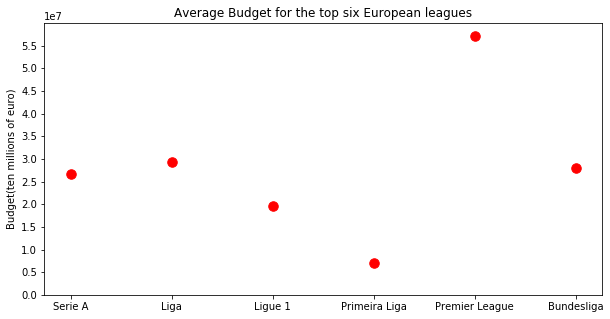

In [148]:
dict_budget = dict_statistics(list_dataframe,list_dataframe_name)[1]
name_leagues = list(dict_budget.keys())
mean_budget = list(dict_budget.values())
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
plt.ylim([0, 6e7])
plt.yticks(np.arange(0, 6e7, 0.5e7))
ax.scatter(name_leagues, mean_budget,s = 90, color = "red")
plt.ylabel('Budget(ten millions of euro)')
plt.title('Average Budget for the top six European leagues')


### Plotting the number of teams for international prestige

In [171]:
list_dataframe = [serie_a,liga,ligue_1,primeira,premier,bundes]
list_dataframe_name =['Serie A','Liga','Ligue 1','Primeira Liga','Premier League','Bundesliga']

def hist_visualiz(dfs,dfs_name):
    dfs = enumerate(dfs)
    fig = plt.figure(figsize = (10,30))
    fig, axs = plt.subplots(6,1,figsize=(10,40))
    color = ['green','red','blue','yellow','purple','gray']
    for position,df in dfs:
        axs[position].hist(df['IntPrestige'], color = color[position],bins = 20)
        axs[position].set_title(dfs_name[position])
        axs[position].set_xlabel('International Prestige Level')
        axs[position].set_ylabel('N. of teams for prestige level')

 

<Figure size 720x2160 with 0 Axes>

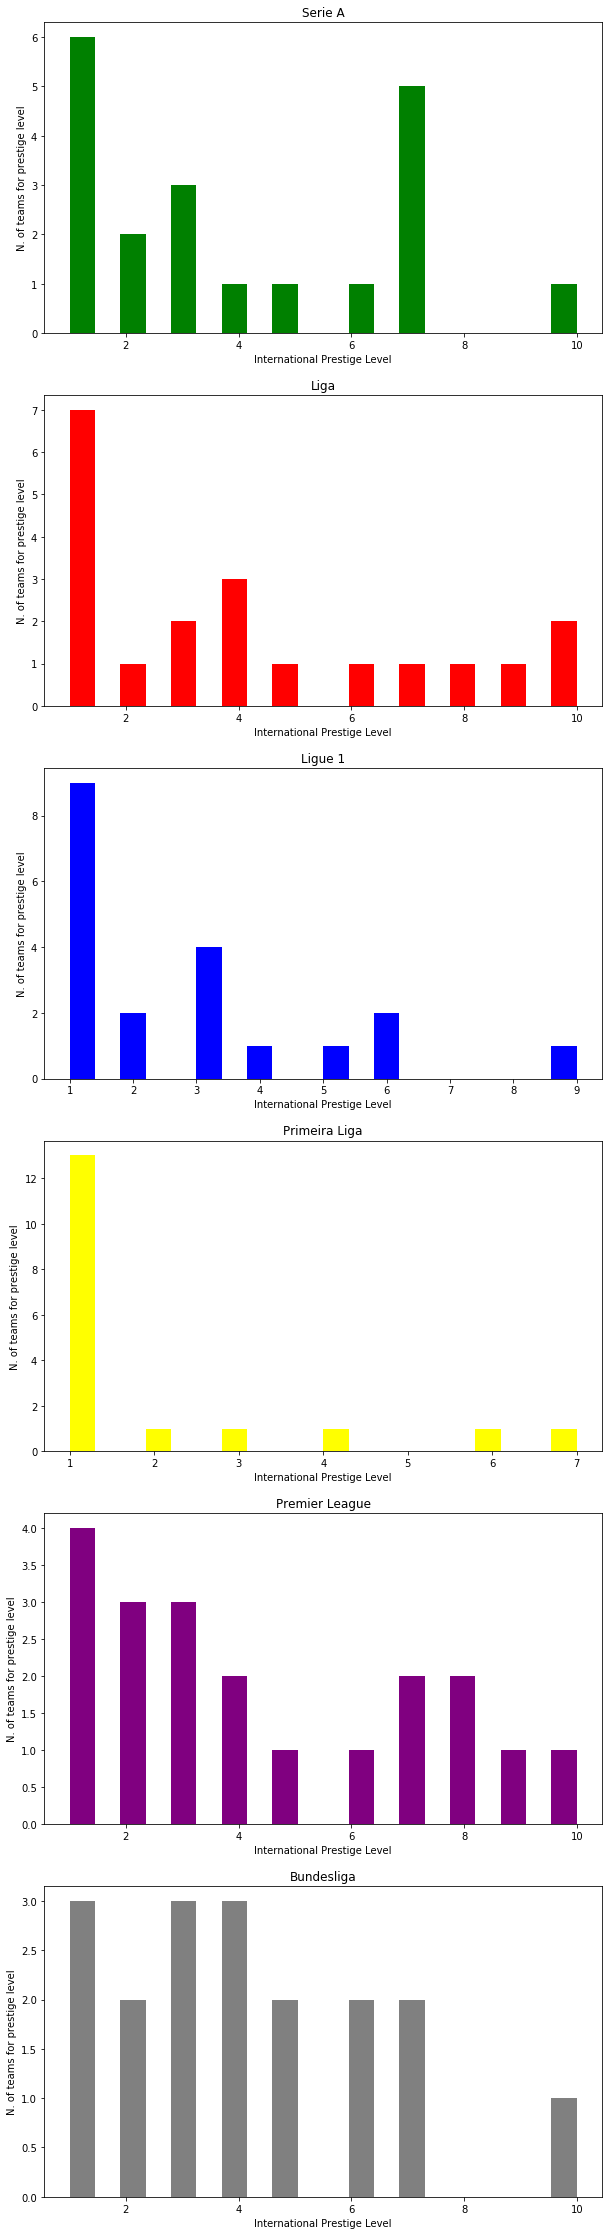

In [172]:
hist_visualiz(list_dataframe,list_dataframe_name)

### Let's drop the outliers on the top (teams with international prestige = 10)

In [62]:
serie_a_wo = serie_a[serie_a['IntPrestige']<10]
liga_wo = liga[liga['IntPrestige']<10]
ligue_1_wo = ligue_1[ligue_1['IntPrestige']<10]
primeira_wo = primeira[primeira['IntPrestige']<10]
premier_wo = premier[premier['IntPrestige']<10]
bundes_wo = bundes[bundes['IntPrestige']<10]


In [63]:
list_dataframe = [serie_a_wo,liga_wo,ligue_1_wo,primeira_wo,premier_wo,bundes_wo]
list_dataframe_name =['Serie A','Liga','Ligue 1','Primeira Liga','Premier League','Bundesliga']

dict_statistics(list_dataframe,list_dataframe_name)
#attention to Empoli! Something is wrong in its DomesticPrestige value : it is = 10.

({'Serie A': (3.63, 4.68),
  'Liga': (3.44, 5.5),
  'Ligue 1': (2.75, 4.95),
  'Primeira Liga': (1.94, 4.78),
  'Premier League': (4.05, 4.89),
  'Bundesliga': (3.76, 4.71)},
 {'Serie A': 22573684.0,
  'Liga': 17133333.0,
  'Ligue 1': 19640000.0,
  'Primeira Liga': 7116667.0,
  'Premier League': 50763158.0,
  'Bundesliga': 23688235.0})

Text(0.5, 1.0, 'Average Budget for the top six European leagues without the most prestigious clubs')

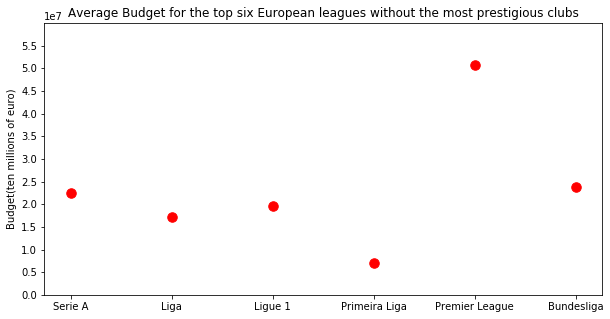

In [153]:
dict_budget = dict_statistics(list_dataframe,list_dataframe_name)[1]
name_leagues = list(dict_budget.keys())
mean_budget = list(dict_budget.values())
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
plt.ylim([0, 6e7])
plt.yticks(np.arange(0, 6e7, 0.5e7))
ax.scatter(name_leagues, mean_budget,s = 90, color = "red")
plt.ylabel('Budget(ten millions of euro)')
plt.title('Average Budget for the top six European leagues without the most prestigious clubs')

<Figure size 720x2160 with 0 Axes>

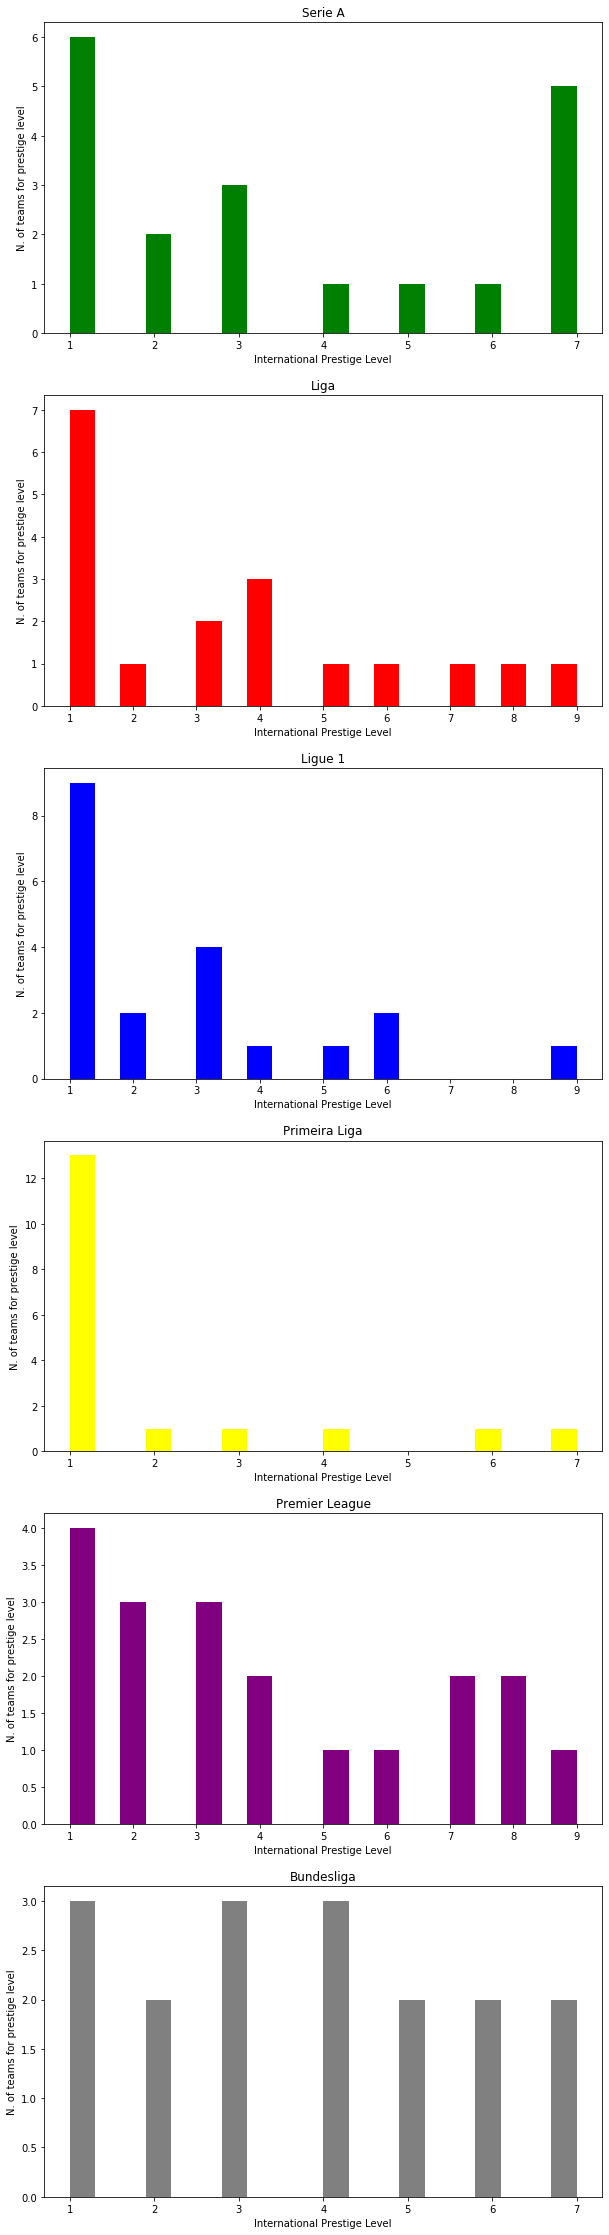

In [175]:
hist_visualiz(list_dataframe,list_dataframe_name)  

In [ ]:
fig = plt.figure(figsize = (10,20))
fig, axs = plt.subplots(5,1,figsize=(10,30))
axs[0].hist(serie_a_wo['IntPrestige'], color ='green',bins = 20)
axs[0].set_title('Serie A')
axs[0].set_xlabel('International Prestige Level')
axs[0].set_ylabel('N. of teams for prestige level')

axs[1].hist(ligue_1_wo['IntPrestige'], color = 'blue',bins = 20)
axs[1].set_title('Ligue 1')
axs[1].set_xlabel('International Prestige Level')
axs[1].set_ylabel('N. of teams for prestige level')

axs[2].hist(liga_wo['IntPrestige'], color ='black',bins = 20)
axs[2].set_title('Liga')
axs[2].set_xlabel('International Prestige Level')
axs[2].set_ylabel('N. of teams for prestige level')

axs[3].hist(premier_wo['IntPrestige'], color = 'red',bins = 20)
axs[3].set_title('Premier League')
axs[3].set_xlabel('International Prestige Level')
axs[3].set_ylabel('N. of teams for prestige level')

axs[4].hist(bundes_wo['IntPrestige'], color = 'yellow',bins = 20)
axs[4].set_title('Bundesliga')
axs[4].set_xlabel('International Prestige Level')
axs[4].set_ylabel('N. of teams for prestige level')


## Observations

#### It seems the serie A is the third league this year in Europe in this way, very near to the Bundesliga. The Premier League seems to be the league with the highest international appeal and the richest.